# Content
1. Multiple regression
2. Regressions with Dummies & Dummy Trap
3. Regressions with Quadratics
4. Regressions with Interaction Terms

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

## 1. Multiple regression

Multiple regression uses the exact same functions as the simple regresison model. You only need to add more variables to your X argument.

Let's reuse the problem in previous Lab.

This dataset contains salary, tenure, and other information from CEOs in America. We will build a model to explore the relationship between CEO's tenure (*ceoten*) and CEO's salary (*salary*).

In [ ]:
#Importing data
df = pd.read_csv('/content/CEO2.csv')

In [ ]:
df.describe()

,salary,age,college,grad,comten,ceoten,sales,profits,mktval,lsalary,lsales,lmktval,comtensq,ceotensq,profmarg
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,865.864407,56.429379,0.971751,0.531073,22.502825,7.954802,3529.463277,207.830508,3600.316384,6.582848,7.231025,7.399410,656.683616,114.124294,6.420110
std,587.589281,8.421890,0.166152,0.500449,12.294735,7.150826,6088.654193,404.454296,6442.276020,0.606059,1.432086,1.133414,577.122655,212.565996,17.860744
min,100.000000,33.000000,0.000000,0.000000,2.000000,0.000000,29.000000,-463.000000,387.000000,4.605170,3.367296,5.958425,4.000000,0.000000,-203.076920
25%,471.000000,52.000000,1.000000,0.000000,12.000000,3.000000,561.000000,34.000000,644.000000,6.154858,6.329721,6.467699,144.000000,9.000000,4.230769
50%,707.000000,57.000000,1.000000,1.000000,23.000000,6.000000,1400.000000,63.000000,1200.000000,6.561031,7.244227,7.090077,529.000000,36.000000,6.833713
75%,1119.000000,62.000000,1.000000,1.000000,33.000000,11.000000,3500.000000,208.000000,3500.000000,7.020191,8.160519,8.160519,1089.000000,121.000000,10.947369
max,5299.000000,86.000000,1.000000,1.000000,58.000000,37.000000,51300.000000,2700.000000,45400.000000,8.575274,10.845446,10.723268,3364.000000,1369.000000,47.457626


First, let's replot the scatterplot between "ceoten" and "lsalary"

<Axes: xlabel='ceoten', ylabel='lsalary'>

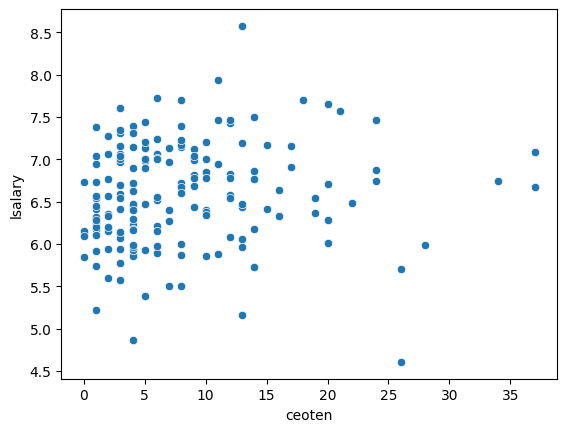

In [ ]:
sns.scatterplot(x= 'ceoten',y = 'lsalary', data = df)

We know that the CEO's salary will also be influenced by the company's profits, outside of his tenure. Logically, a poor company cannot afford to pay its CEO too much.

<Axes: xlabel='profits', ylabel='lsalary'>

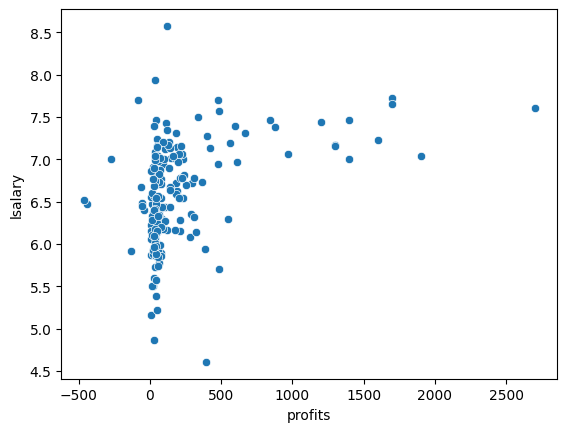

In [ ]:
sns.scatterplot(x = 'profits', y = 'lsalary',data = df)

Therefore, our new (multiple) regression model this time will be:
- lnsalary = $B_0$ + $B_1$ceoten +  $B_2$profit

In [ ]:
#Define X series
X = df[['ceoten','profits']]
X = sm.add_constant(X)

#Define Y series
Y = df['lsalary']

#Fit model:
model_1 = sm.OLS(endog = Y, exog = X).fit()

print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                lsalary   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     18.15
Date:                Fri, 14 Mar 2025   Prob (F-statistic):           6.96e-08
Time:                        04:45:29   Log-Likelihood:                -145.25
No. Observations:                 177   AIC:                             296.5
Df Residuals:                     174   BIC:                             306.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.3753      0.066     96.069      0.0

Our previous simple regression model in previous Lab:

- lnsalary = $B_0$ + $B_1$ceoten

In [ ]:
#Let's run another model with linear relationship between ceoten and lsalary and compare
X2 = df[['ceoten']]
X2 = sm.add_constant(X2)

model_2 = sm.OLS(endog = Y, exog = X2).fit()
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                lsalary   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     2.334
Date:                Fri, 14 Mar 2025   Prob (F-statistic):              0.128
Time:                        04:45:29   Log-Likelihood:                -160.84
No. Observations:                 177   AIC:                             325.7
Df Residuals:                     175   BIC:                             332.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.5055      0.068     95.682      0.0

In [ ]:
import statsmodels.iolib.summary2 as sms

#To compare the two model side-by-side, execute the following:
print(sms.summary_col([model_1, model_2], model_names=['Multiple','Simple'], stars=True, regressor_order=['const','ceoten','profits']))


                Multiple   Simple 
----------------------------------
const          6.3753*** 6.5055***
               (0.0664)  (0.0680) 
ceoten         0.0105*   0.0097   
               (0.0058)  (0.0064) 
profits        0.0006***          
               (0.0001)           
R-squared      0.1726    0.0132   
R-squared Adj. 0.1631    0.0075   
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


### **Exercises: Find the direction of OVB**

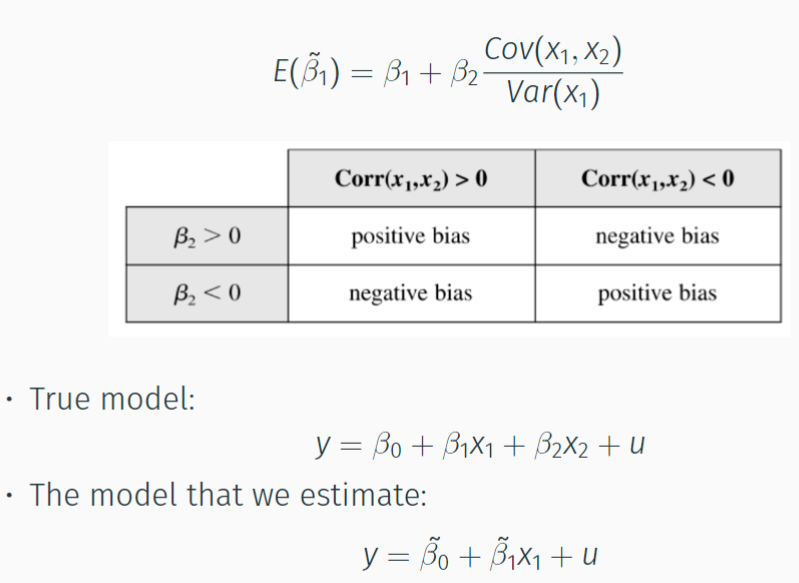

Correlation betwenn "ceoten" and "profits"

In [ ]:
df['ceoten'].corr(df['profits'])

-0.0216067502859885

In [ ]:
profits_coefficient = model_1.params['profits']
print("Coefficient for 'profits':", profits_coefficient)

Coefficient for 'profits': 0.0005984259972413777


# 2. Regressions with Dummies & The Dummy Trap

We know that the CEO's salary will also be influenced by the company's profits, outside of his tenure. Logically, a poor company cannot afford to pay its CEO too much.

Another thing we suspect is if the company is older, then it will pay the CEO more. So we will categorize the company size into Young - Mid - Old companies depending on the company's age.
- If a company < 10 years, then it is Young
- If a company is between 10 years and 20 years, then it is Mid
- If a company is > 20 years, then it is Old

We will run the following regression:
log(salary) ~ ceoten + profits + young + mid

Where young is a dummy, takes 1 if the company is Young, 0 otherwise
mid is another dummy, takes 1 if the company is Mid, 0 otherwise

**Challenge: Why don't we include Old as a dummy as well?**

In [ ]:
# First we categorize the companies based on their size using np.where
df['comAge'] = np.where(df['comten'] < 10, 'young', np.where(df['comten'] > 20, 'old', 'mid'))

# Then we use pandas dummy function to create a set of dummies based on the categories we have in comAge
df_new = pd.get_dummies(df, columns = ['comAge'])

df_new.head(10)

,salary,age,college,grad,comten,ceoten,sales,profits,mktval,lsalary,lsales,lmktval,comtensq,ceotensq,profmarg,comAge_mid,comAge_old,comAge_young
0,1161,49,1,1,9,2,6200,966,23200,7.057037,8.732305,10.051908,81,4,15.580646,False,False,True
1,600,43,1,1,10,10,283,48,1100,6.396930,5.645447,7.003066,100,100,16.961130,True,False,False
2,379,51,1,1,9,3,169,40,1100,5.937536,5.129899,7.003066,81,9,23.668638,False,False,True
3,651,55,1,0,22,22,1100,-54,1000,6.478509,7.003066,6.907755,484,484,-4.909091,False,True,False
4,497,44,1,1,8,6,351,28,387,6.208590,5.860786,5.958425,64,36,7.977208,False,False,True
5,1067,64,1,1,7,7,19000,614,3900,6.972606,9.852194,8.268732,49,49,3.231579,False,False,True
6,945,59,1,0,35,10,536,24,623,6.851185,6.284134,6.434546,1225,100,4.477612,False,True,False
7,1261,63,1,1,32,8,4800,191,2100,7.139660,8.476371,7.649693,1024,64,3.979167,False,True,False
8,503,47,1,1,4,4,610,7,454,6.220590,6.413459,6.118097,16,16,1.147541,False,False,True
9,1094,64,1,1,39,5,2900,230,3900,6.997596,7.972466,8.268732,1521,25,7.931035,False,True,False


In [ ]:
#compare with variable comAge in the original data set before transforming them into dummies
df['comAge']

,comAge
0,young
1,mid
2,young
3,old
4,young
...,...
172,old
173,old
174,old
175,mid


# 3. Models with Quadratic & Interaction Terms
Quadratic term for age^2 to test whether there is diminishing returns from the impact of age on lsalary

In [ ]:
df_new['age^2'] = df_new['age']**2
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   salary        177 non-null    int64  
 1   age           177 non-null    int64  
 2   college       177 non-null    int64  
 3   grad          177 non-null    int64  
 4   comten        177 non-null    int64  
 5   ceoten        177 non-null    int64  
 6   sales         177 non-null    int64  
 7   profits       177 non-null    int64  
 8   mktval        177 non-null    int64  
 9   lsalary       177 non-null    float64
 10  lsales        177 non-null    float64
 11  lmktval       177 non-null    float64
 12  comtensq      177 non-null    int64  
 13  ceotensq      177 non-null    int64  
 14  profmarg      177 non-null    float64
 15  comAge_mid    177 non-null    bool   
 16  comAge_old    177 non-null    bool   
 17  comAge_young  177 non-null    bool   
 18  age^2         177 non-null    

Include interaction terms when the relationship between X and Y depends on Z

In [ ]:
df_new['grad*ceoten'] = df_dummy['grad']*df_dummy['ceoten']
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   salary        177 non-null    int64  
 1   age           177 non-null    int64  
 2   college       177 non-null    int64  
 3   grad          177 non-null    int64  
 4   comten        177 non-null    int64  
 5   ceoten        177 non-null    int64  
 6   sales         177 non-null    int64  
 7   profits       177 non-null    int64  
 8   mktval        177 non-null    int64  
 9   lsalary       177 non-null    float64
 10  lsales        177 non-null    float64
 11  lmktval       177 non-null    float64
 12  comtensq      177 non-null    int64  
 13  ceotensq      177 non-null    int64  
 14  profmarg      177 non-null    float64
 15  state         177 non-null    int64  
 16  age^2         177 non-null    int64  
 17  comAge_mid    177 non-null    uint8  
 18  comAge_old    177 non-null    

**Now let's run the model with both quadratic and interaction terms:**

lsalary = B0 + B1ceoten + B2profits + B3comAge_young + B4comAge_mid + B5age + B6age^2 + B7grad*ceoten

*Note: Remember this is a sample code, please adjust your model according to the questions' requirements and your goals.*

In [ ]:
#Let's run a model with linear relationship between ceoten and lsalary and compare
X2 = df_new[['ceoten','profits', 'comAge_young','comAge_mid','age','age^2','grad*ceoten']]
X2 = sm.add_constant(X2)

Y = df_new['lsalary']

model_2 = sm.OLS(endog = Y, exog = X2).fit()
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                lsalary   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     5.663
Date:                Fri, 03 Nov 2023   Prob (F-statistic):           6.87e-06
Time:                        10:03:07   Log-Likelihood:                -143.37
No. Observations:                 177   AIC:                             302.7
Df Residuals:                     169   BIC:                             328.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.4333      1.326      3.343   